<h1 align="center">Regularization</h1>

## Explainer Video

In [1]:
from IPython.display import HTML
HTML('<iframe src="https://player.vimeo.com/video/284139105" width="800" height="600" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>')

C:\Users\makra\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

## Dataset

In [3]:
# Loading the data for Mini-Challenges
df = pd.read_csv('auto.csv')
mpg = df.iloc[:,0]
df.drop(['origin','mpg'],axis=1,inplace=True)
df = pd.concat([df,mpg],axis=1)
df.head()

,displ,hp,weight,accel,size,mpg
0,250.0,88,3139,14.5,15.0,18.0
1,304.0,193,4732,18.5,20.0,9.0
2,91.0,60,1800,16.4,10.0,36.1
3,250.0,98,3525,19.0,15.0,18.5
4,97.0,78,2188,15.8,10.0,34.3


# <img src="../images/icon/ppt-icons.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Mini Challenge - 1
***
### Instructions
* Store all independent variables in `X` variable and target varaible(i.e mpg) in `y` variable.
* Perform a Hold-Out cross-validation by splitting the data into train and test with `random_state=9` and `test_size = 0.2`

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(['mpg'],1)
y =df['mpg']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 9) 

<img src="../images/icon/ppt-icons.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Mini Challenge - 2
***
### Instructions
* Fit a Linear Regression model on the validated dataset above and find the mean squared error for linear regression.

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mse = np.sqrt(mean_squared_error(y_pred,y_test))
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test,y_pred)
print(r2)
print(mse)

0.7167434091232933


<img src="../images/icon/ppt-icons.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Mini Challenge - 3
***
### Instructions
* Fit a Lasso model on the same validated dataset having `alpha=140`, `max_iter=100000`, `random_state=9`

In [30]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 140,max_iter=100000, random_state=9)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
mse1 = np.sqrt(mean_squared_error(lasso_pred,y_test))
mse1

3.700871863126401

<img src="../images/icon/ppt-icons.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Mini Challenge - 4
***
### Instructions
* Fit a Ridge model having `alpha=0.00001`, `max_iter=100000`, `random_state=9`

In [31]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.00001, max_iter=100000, random_state=9)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
mse2 = np.sqrt(mean_squared_error(ridge_pred,y_test))
mse2

3.6392688241088913

<img src="../images/icon/ppt-icons.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Mini Challenge - 5
***
### Instructions
* Perform a k-fold cross validation with parameter `cv=5` and model as linear regression and scoring parameter as  `neg_mean_squared_error`.

In [40]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
neg_mean_squared_error  = make_scorer(mean_squared_error, greater_is_better=True)
np.mean(cross_val_score(lr,X,y,cv = 5,scoring= neg_mean_squared_error))


18.22493195443876

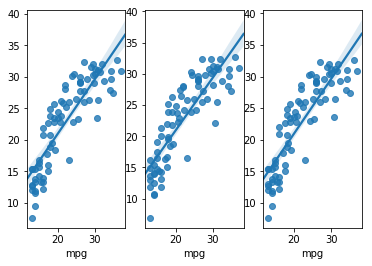

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
sns.regplot(y_test,y_pred)
plt.subplot(1,3,2)
sns.regplot(y_test,lasso_pred)
plt.subplot(1,3,3)
sns.regplot(y_test,ridge_pred)

## Quiz

Q1. Which of the following statement(s) is / are true for Gradient Decent (GD) and Stochastic Gradient Decent (SGD)?
```python
1. In GD and SGD, you update a set of parameters in an iterative manner to minimize the error function. 
2. In SGD, you have to run through all the samples in your training set for a single update of a parameter 
   in each    iteration. 
3. In GD, you either use the entire data or a subset of training data to update a parameter in each 
   iteration. 

A) Only 1
B) Only 2
C) Only 3
D) 1 and 2
E) 2 and 3
F) 1,2 and 3



```
Q2. Which of the following options is/are true for K-fold cross-validation?
```python
1. Increase in K will result in higher time required to cross validate the result.
2. Higher values of K will result in higher confidence on the cross-validation result as compared to lower 
   value of K.
3. If K=N, then it is called Leave one out cross validation, where N is the number of observations.
 

A) 1 and 2
B) 2 and 3
C) 1 and 3
D) 1,2 and 3


```
Q3. Which of the following is true about “Ridge” or “Lasso” regression methods in case of feature selection?
```python
A. Ridge regression uses subset selection of features
B. Lasso regression uses subset selection of features
C. Both use subset selection of features
D. None of above

```
Q4. What is/are true about ridge regression?
```python
1. When lambda is 0, model works like linear regression model
2. When lambda is 0, model doesn’t work like linear regression model
3. When lambda goes to infinity, we get very, very small coefficients approaching 0
4. When lambda goes to infinity, we get very, very large coefficients approaching infinity

A. 1 and 3
B. 1 and 4
C. 2 and 3
D. 2 and 4

```

# Thank You
***
## Next Session: EDA and Data Pre-processing

For more queries - Reach out to academics@greyatom.com 